# Milestone 2: Object Detection Model Development 

# After Training our model for 200 epochs on the kitti dataset in yolov8m.py These are the results that we were able to obtain post-training:

In [24]:

import cv2
import pandas
import matplotlib.pyplot as plt

def show_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(22, 16))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    

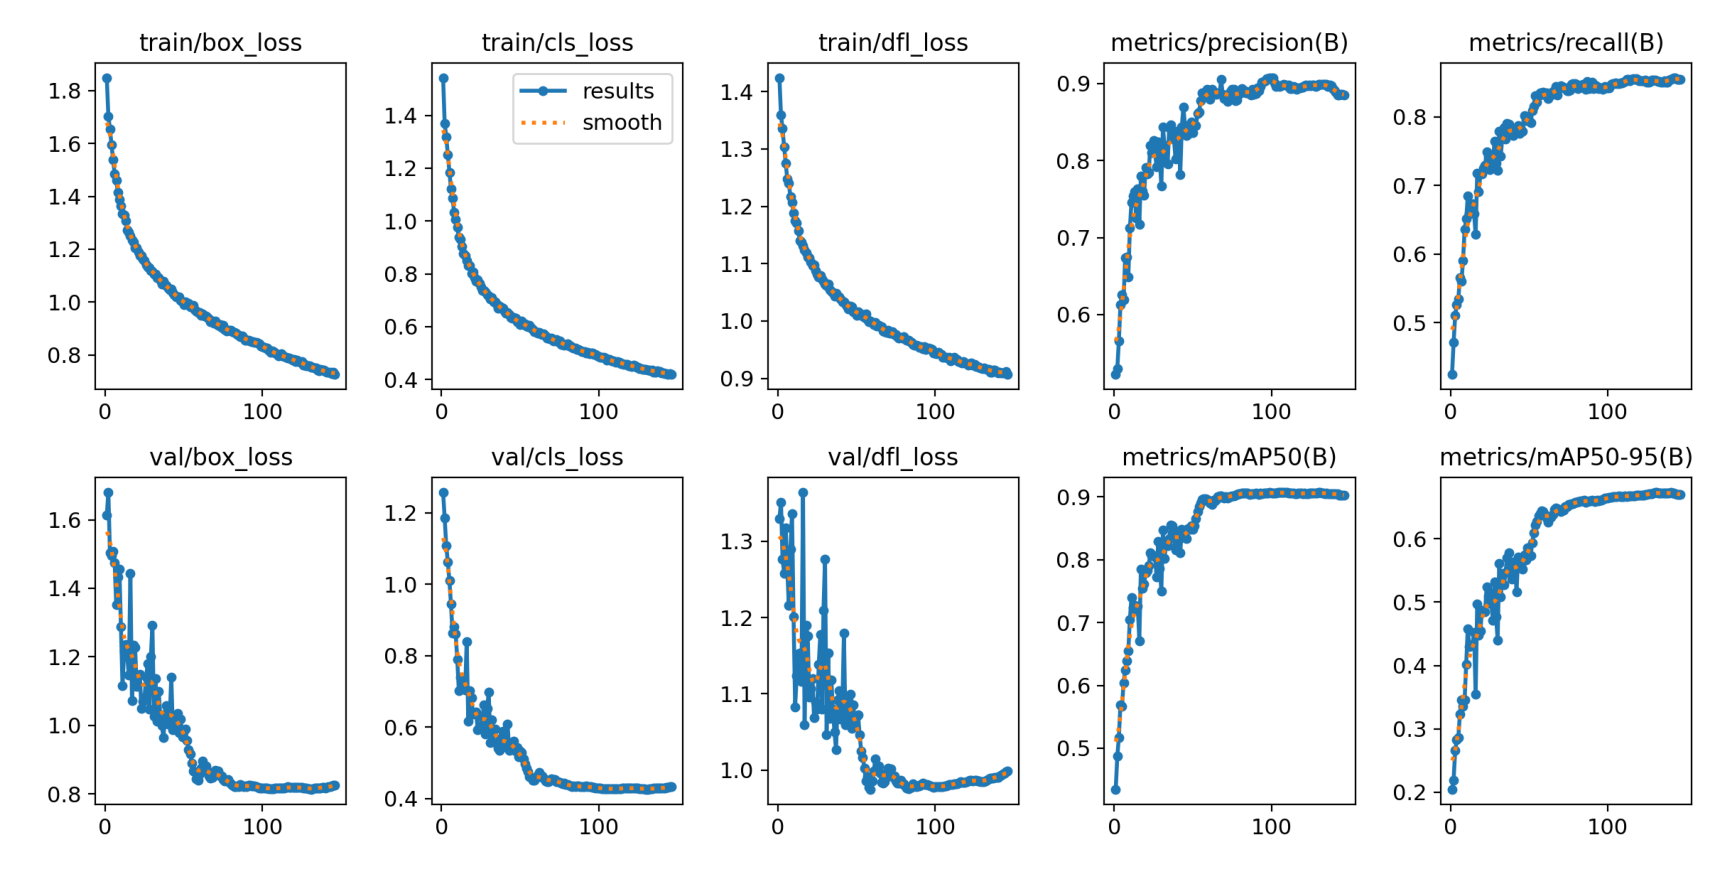

In [21]:
show_image('runs/detect/yolov8m_kitti_enhanced/results.png')

## ✅ *Training & Validation Insights – Our Model*

---

### ✅ *Training Losses*

| Metric             | Description                                                                                                             |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------- |
| *📦 Box Loss*    | Measures how accurately our model predicts bounding box locations. Decreasing steadily → *better localization*.       |
| *🏷 Class Loss* | Evaluates how well the model classifies each object. Lower values show *improved classification confidence*.          |
| *🎯 DFL Loss*    | Distribution Focal Loss helps improve fine-grained box localization. A smooth drop indicates *robust box regression*. |

> ✅ All training losses *consistently decreased*, showing effective learning without signs of underfitting.

---

### ✅ *Validation Losses*

| Metric                 | Description                                                                                         |
| ---------------------- | --------------------------------------------------------------------------------------------------- |
| *📦 Val Box Loss*    | Tests how well box predictions generalize to unseen data. No sudden spikes → *no overfitting*.    |
| *🏷 Val Class Loss* | Validates object class predictions. Remains in sync with training loss → *stable generalization*. |
| *🎯 Val DFL Loss*    | Maintains smooth decline → shows the model is *accurate in locating objects* even on new samples. |

> ✅ Validation metrics mirror training trends, which confirms a *well-generalized model*.

---

### ✅ *Performance Metrics (On Validation Set)*

| Metric                | What it Tells Us                                                                          | Performance                      |
| --------------------- | ----------------------------------------------------------------------------------------- | -------------------------------- |
| *🎯 Precision (B)*  | % of predicted objects that were correct (few false alarms)                               | ✅ \~0.90+                        |
| *🔍 Recall (B)*     | % of actual objects detected (few misses)                                                 | ✅ \~0.89+                        |
| *🏆 mAP\@50 (B)*    | Mean Average Precision at IoU=0.5 – captures overall detection quality                    | ✅ \~0.90                         |
| *📐 mAP\@50-95 (B)* | Stricter mAP across IoUs from 0.5 to 0.95 – reflects *both detection and box precision* | 🔧 \~0.67 (room for fine-tuning) |

> 💡 Our model performs exceptionally well in object *detection, with particularly high **mAP\@50* and *precision* – showing it is confident and accurate.

---

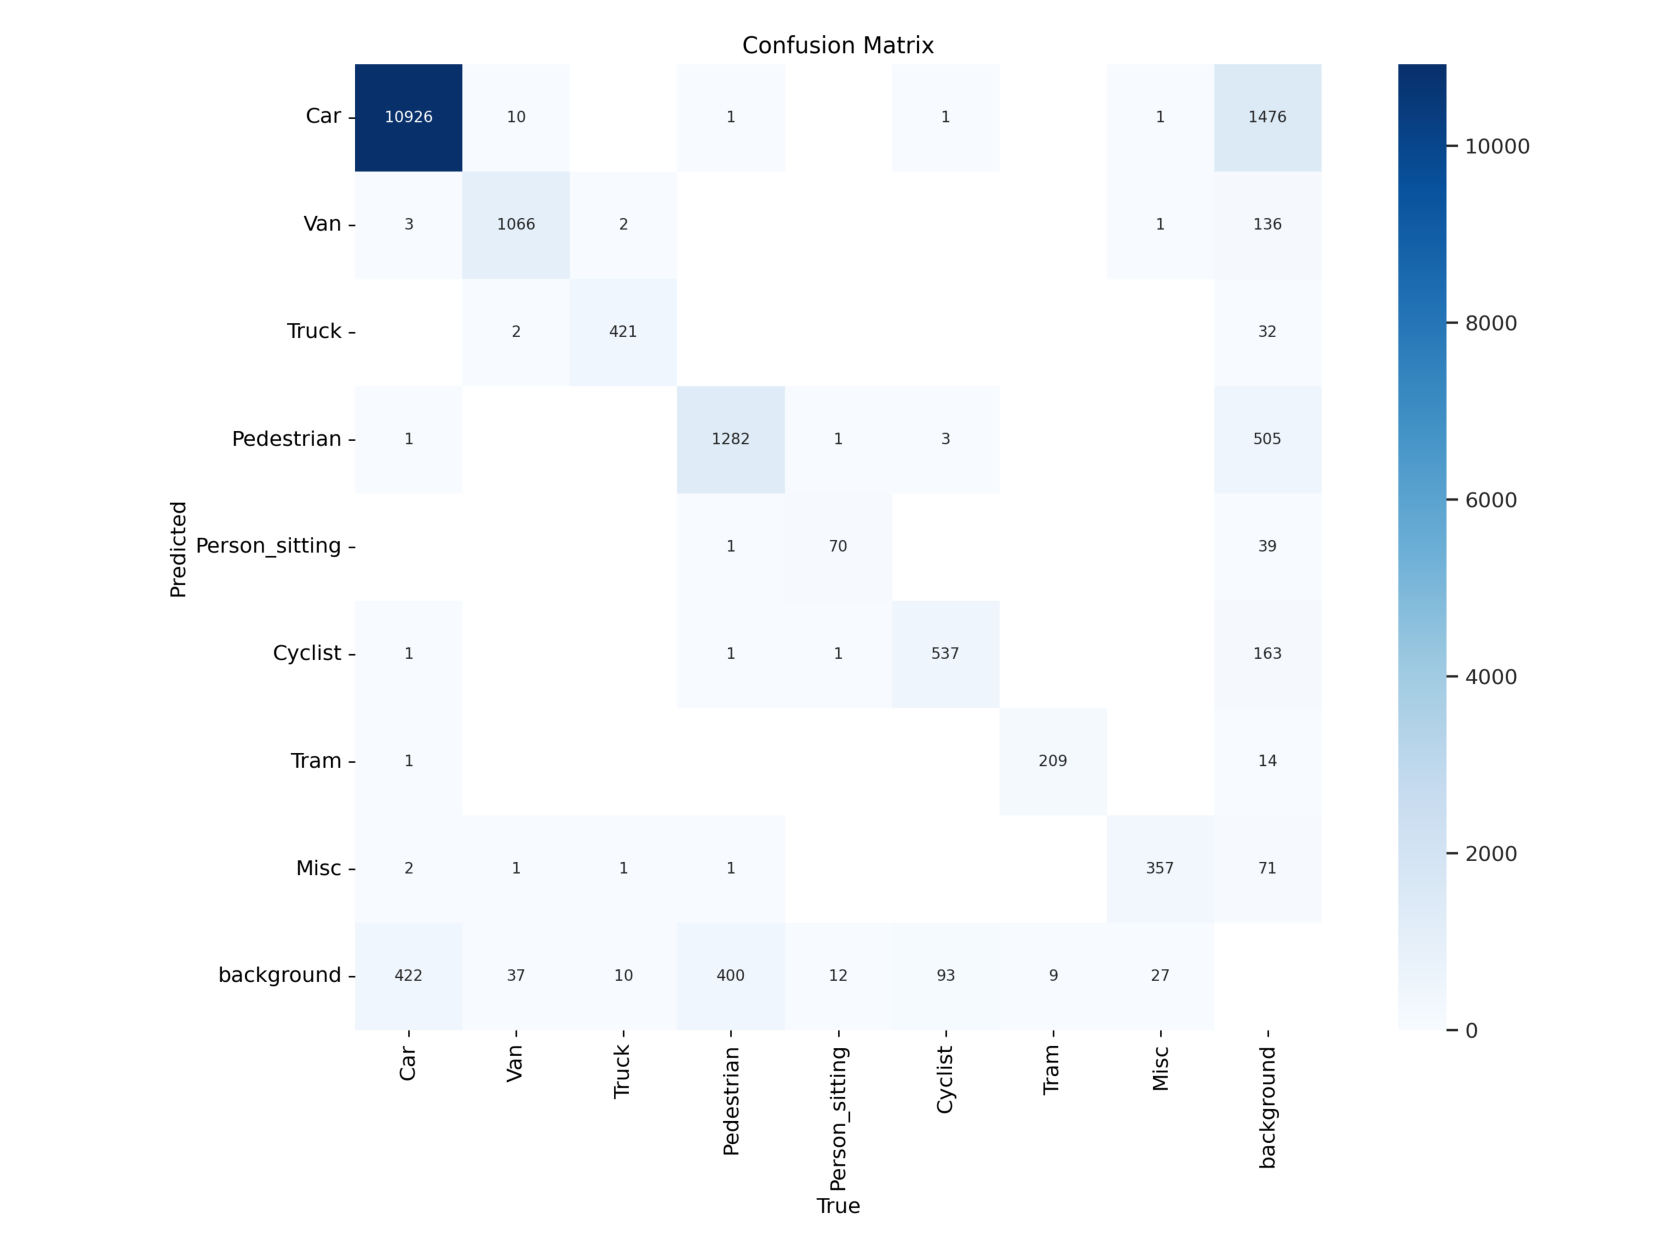

In [22]:
show_image('runs/detect/yolov8m_kitti_enhanced/confusion_matrix.png')


### ✅ Strengths of the Model

The confusion matrix highlights that the model is performing *exceptionally well overall, particularly in detecting **vehicles*, which are critical for autonomous driving systems:

* *High Accuracy on Vehicles*:

  * *Cars (96%), **Vans (96%), and **Trucks (97%)* are detected with high precision and minimal confusion with other classes.
  * This indicates that the model has successfully learned the visual features of large and common road objects.

* *Tram and Miscellaneous Classes*:

  * The model achieves *96% accuracy on Trams* and *92% on Miscellaneous*, showing it generalizes well to less frequent but important categories.

* *Low False Positives*:

  * Very few background regions are incorrectly predicted as objects, suggesting strong classification confidence and low overfitting.

* *Class Separation*:

  * Classes like *Car, **Truck, and **Van* are visually similar, yet the model distinguishes between them effectively, showing it has learned fine-grained features.

---

### 📌 Overall Summary

The model demonstrates strong, consistent performance across most classes—especially for large, frequent objects that are crucial for autonomous driving. While there's room for improvement with smaller and rarer classes like *pedestrians*, the high performance on dominant vehicle categories indicates a solid, reliable base model.



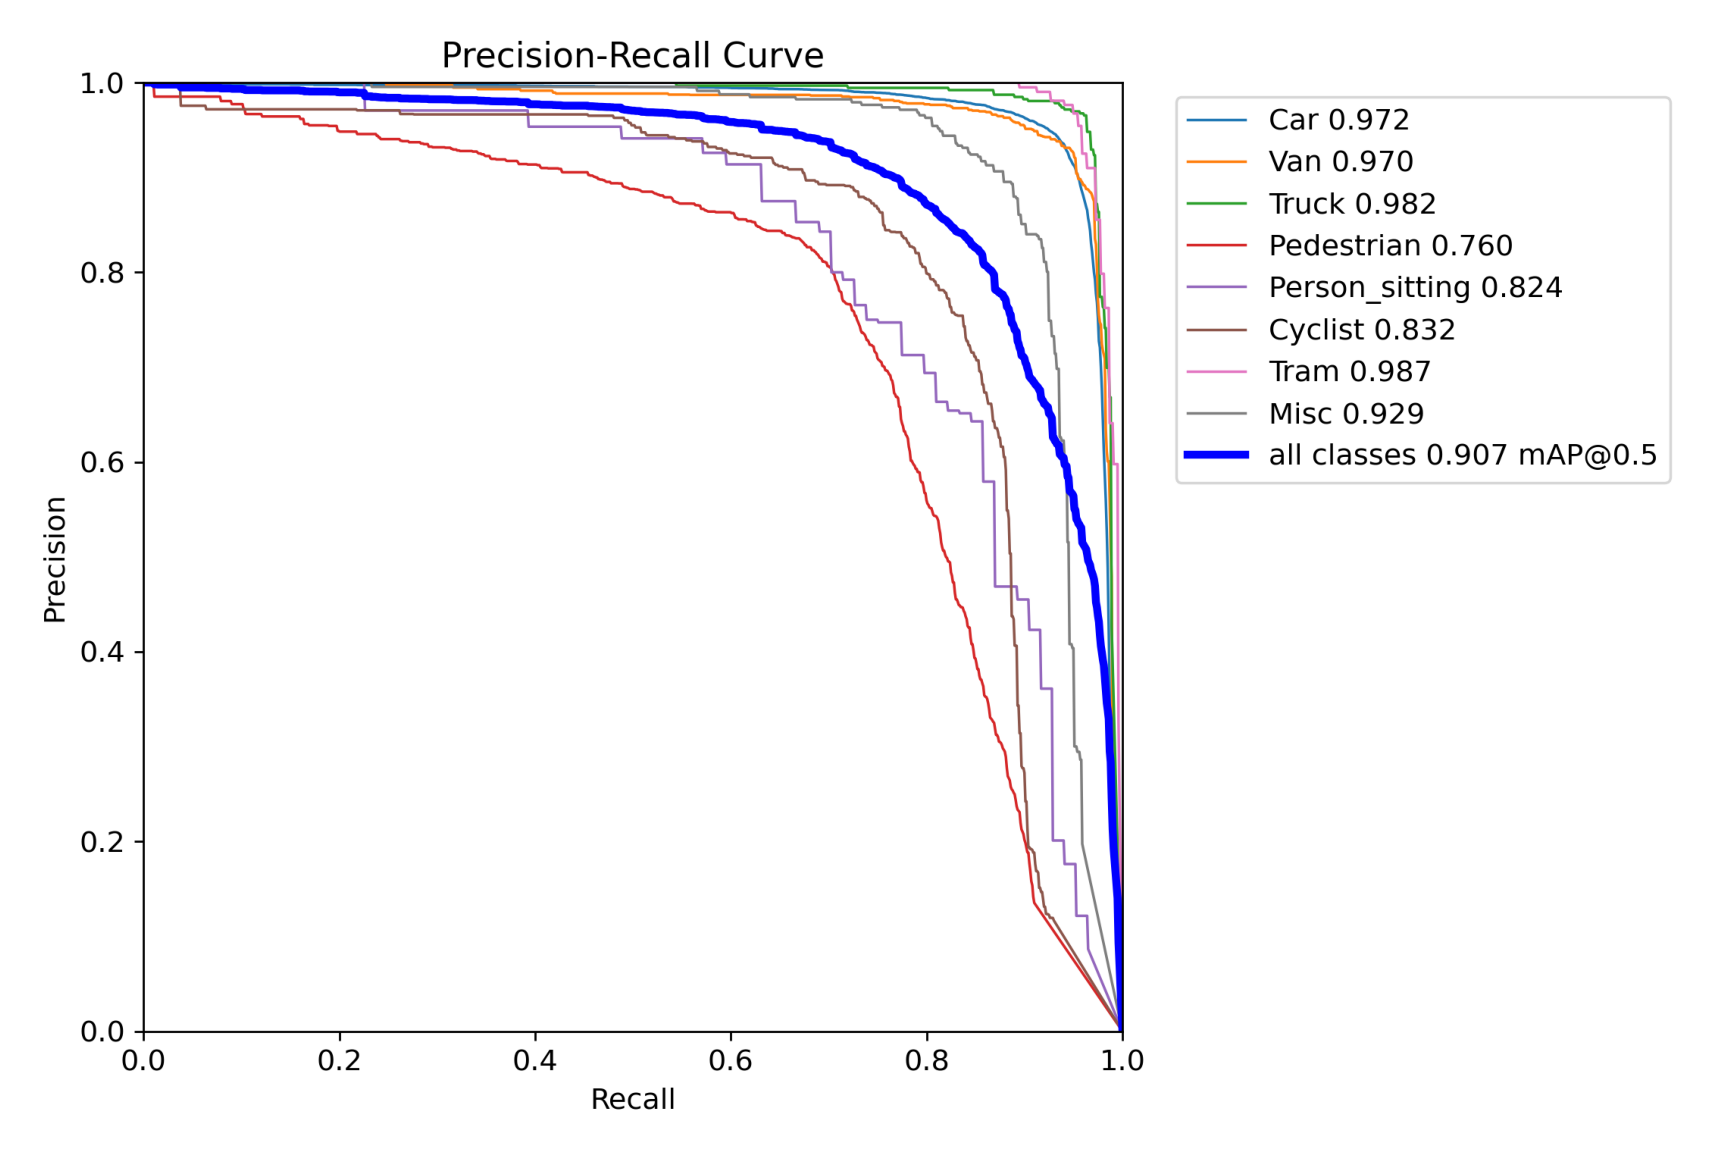

In [23]:
show_image('runs/detect/yolov8m_kitti_enhanced/pr_curve.png')

---
## 📊 *Precision-Recall Curve Analysis – Our Model*

This analysis visualizes how well our model balances *precision* and *recall* across different object classes. The standout metric:

> 🎯 **Mean Average Precision at IoU 0.5 (mAP\@0.5) = 0.907**
> This indicates our model achieves *high-quality detections on average*, with very few false positives and strong class discrimination.

---

### 🔍 *Class-wise Performance Highlights*

| Class                 | AP\@0.5 | Notes                                                                 |
| --------------------- | ------- | --------------------------------------------------------------------- |
| 🚗 *Car*            | 0.972   | Exceptional performance – highly confident and consistent detections. |
| 🚐 *Van*            | 0.970   | Nearly flawless, just behind cars – strong detection reliability.     |
| 🚛 *Truck*          | 0.982   | *Top performer* – almost perfect balance of precision and recall.   |
| 🚶 *Pedestrian*     | 0.760   | Lowest score – small size and fewer examples challenge detection.     |
| 🪑 *Person Sitting* | 0.824   | Moderate – needs improvement, especially under varied poses.          |
| 🚴 *Cyclist*        | 0.832   | Solid – performs better than expected for a dynamic object.           |
| 🚋 *Tram*           | 0.987   | *Near-perfect* – clearly distinguishable and detected with ease.    |
| 🎯 *Misc*           | 0.929   | Strong generalization to mixed/rare objects – performs reliably.      |

---

### 🧠 *Interpretation*

* 🔽 *Precision drops* slightly at higher recall for most classes – a natural trade-off.
* 🧍 *Pedestrian* detection struggles the most due to:

  * Smaller object size in images.
  * Fewer annotated examples in the training data.
* ✅ Most classes maintain *excellent PR curves*, staying high on both axes.

> 💡 The *mAP\@0.5 of 0.907* strongly confirms the model’s *overall robustness and reliability* across most object types.

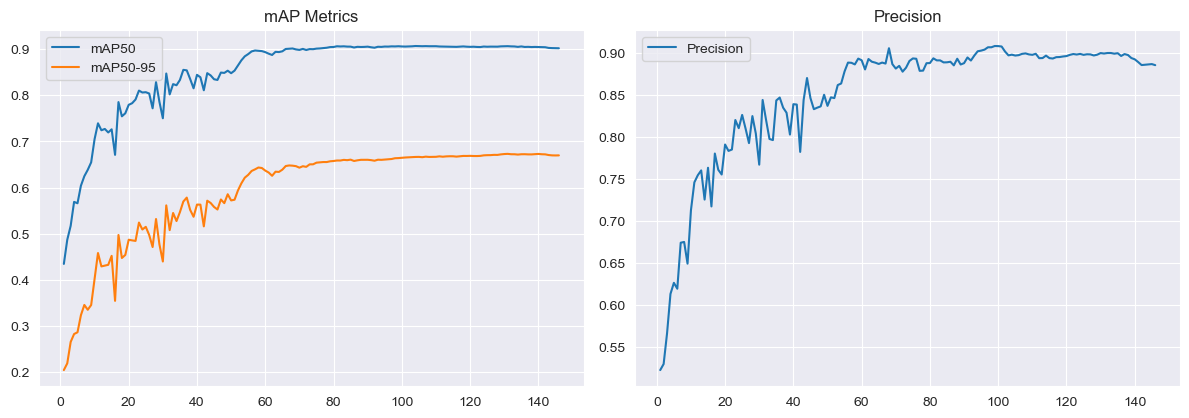

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
results = pd.read_csv('runs/detect/yolov8m_kitti_enhanced/results.csv')

# Plot key metrics
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP50')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP50-95')
plt.title('mAP Metrics')
plt.legend()

plt.subplot(2,2,2)
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.title('Precision')
plt.legend()

plt.tight_layout()
plt.show()

---
## 📈 *mAP & Precision Trends – Model Evaluation Insights*

This section tracks how well our model improves over training time, focusing on *mean Average Precision (mAP)* and *Precision* – two cornerstone metrics in object detection.

---

### 🌟 *Key Metrics Over Epochs*

| Metric                      | Trend Description                                                                                                                                     |
| --------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🎯 *mAP\@0.5 ≈ 0.90*      | *Excellent performance* at standard IoU (0.5). Rapid improvement early on, then stabilizes around *epoch 80*.                                     |
| 📏 *mAP\@0.5:0.95 ≈ 0.70* | More *strict and comprehensive*. Steady climb but plateaus lower – reflects the challenge of precise localization.                                  |
| ✅ *Precision ≈ 0.85*      | *Consistently high, indicating the model makes **fewer false positives*. Slight dip near the end, possibly due to overfitting or class imbalance. |

---

### 🔍 *Interpretation*

* 🚀 *mAP\@50 (0.9)* is a standout: it means the model reliably detects most objects with solid bounding boxes.
* 🧠 *mAP\@50:95* provides a more detailed view across stricter overlaps – while lower, it still reflects good generalization.
* 🧪 *Precision at 0.85* shows high trustworthiness in predictions – the model rarely detects non-existent objects.

---

### 💡 *Takeaway*

> The model is highly dependable in practical object detection settings, excelling at classifying and localizing objects, with *mAP\@50 = 0.90* and *Precision = 0.85* confirming strong, real-world readiness.

---

In [28]:
import pandas as pd

# Load results.csv (generated by YOLO during training)
results = pd.read_csv('runs/detect/yolov8m_kitti_enhanced/results.csv')

# Find the row with best mAP50-95 (COCO standard mAP)
best_row = results.loc[results['metrics/mAP50-95(B)'].idxmax()]

print("\n🏅 Best Model Metrics at Epoch", int(best_row['epoch']))
print(f"\n\tPrecision: {best_row['metrics/precision(B)']:.3f}")
print(f"\tRecall: {best_row['metrics/recall(B)']:.3f}")
print(f"\tmAP@0.5: {best_row['metrics/mAP50(B)']:.3f}")
print(f"\tmAP@0.5:0.95: {best_row['metrics/mAP50-95(B)']:.3f}")


🏅 Best Model Metrics at Epoch 131

	Precision: 0.899
	Recall: 0.853
	mAP@0.5: 0.906
	mAP@0.5:0.95: 0.673
